# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import copy

# Exercise 1: Identity Matrix

In [2]:
identity_matrix = np.identity(5)
print(identity_matrix)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# Exercise 2: Univariate Linear Regression

### Import Data from a File

In [3]:
data_ex2 = pd.read_csv('ex1data1.txt', sep=",", header=None, names=["Population", "Profit"])
print(data_ex2.head(10))
data_X_ex2 = data_ex2.iloc[:, :len(data_ex2.columns)-1]
data_y_ex2 = data_ex2.iloc[:, len(data_ex2.columns)-1:]

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166


Scatter Plot

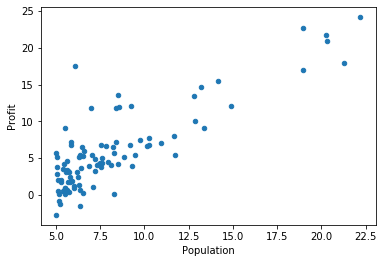

In [4]:
data_ex2.plot.scatter('Population', 'Profit')

### Utils

In [5]:
def add_column_of_x0(matrix):
    rows = matrix.shape[0]
    columns = matrix.shape[1]
    new_matrix = np.ones((rows, columns+1))
    new_matrix[:, 1:] = matrix
    return new_matrix

def get_m(X):
    return X.shape[0]

def get_n(X):
    return X.shape[1]-1

def init_theta(X, y):
    return np.zeros((X.shape[1], y.shape[1]))

Create Matrix X and y

In [6]:
tmp_X_ex2 = data_X_ex2.to_numpy()
print("Samples:", tmp_X_ex2.shape[0])
print("Features:", tmp_X_ex2.shape[1])

# add x0
X_ex2 = add_column_of_x0(tmp_X_ex2)
print("X:", X_ex2.shape)

y_ex2 = data_y_ex2.to_numpy()
print("y:", y_ex2.shape)

Samples: 97
Features: 1
X: (97, 2)
y: (97, 1)


In [7]:
# print("X:", X)
# print("y:", y)

Set learning rate and iteration

In [8]:
alpha_ex2 = 0.01
iterations_ex2 = 1500

###  Cost Function Calculation

In [9]:
def calculate_j(theta, X, y):
    m = get_m(X)
    hx = np.matmul(X, theta)
    return (1/(2 * m)) * np.sum(np.square(hx - y))

### Alternative Cost Function Calculation (From Exercise 3 Below)
This is an alternative way to calculate J from Exercise 3 (matrix perspective).

In [10]:
def alt_calculate_j(theta, X, y):
    m = get_m(X)
    X_theta = np.matmul(X, theta)
    hx_y = X_theta - y
    return 1/(2*m)*np.sum(np.dot(np.transpose(hx_y), hx_y))

In [11]:
print(calculate_j(init_theta(X_ex2, y_ex2), X_ex2, y_ex2))
print(alt_calculate_j(init_theta(X_ex2, y_ex2), X_ex2, y_ex2))

32.072733877455676
32.07273387745567


### Theta Update

In [12]:
def update_theta(theta, X, y, alpha):
    m = get_m(X)
    
    hx = np.matmul(X, theta)
    err = hx - y
    return theta - alpha/(2*m)*np.matmul(np.transpose(X), err)

### Gradient Descent

In [13]:
def gradient_descent_calculation(X, y, alpha, iterations):
    theta = init_theta(X, y)
    
#     old_j = calculate_j(theta, X, y)
    old_j = alt_calculate_j(theta, X, y)
    theta = update_theta(theta, X, y, alpha)
    
    for i in range(1, iterations):
#         j = calculate_j(theta, X, y)
        j = alt_calculate_j(theta, X, y)
        theta = update_theta(theta, X, y, alpha)
        
        if j > old_j:
            print(f"J increases on loop {i} from value {old_j} to {j}")
#     Break if the change in J is too low
        if old_j - j <= 0.00001:
            print(f"Converge on loop {i}")
            break
        old_j = j

    print("J:", j)
    return theta

In [14]:
iterations_ex2 = 1500
theta_ex2 = gradient_descent_calculation(X_ex2, y_ex2, alpha_ex2, iterations_ex2)
print(theta_ex2)

J: 4.573350527480161
[[-2.86779958]
 [ 1.08976177]]


# Exercise 3: Multivariate Linear Regression

### Import Data from a File

In [15]:
data_ex3 = pd.read_csv('ex1data2.txt', sep=",", header=None, names=["Size", "Bedrooms", "Price"])
print(data_ex3.head(10))
    
data_X_ex3 = data_ex3.iloc[:, :len(data_ex3.columns)-1]
data_y_ex3 = data_ex3.iloc[:, len(data_ex3.columns)-1:]

   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500


### Feature Normalization

In [16]:
def normalize_feature(matrix, has_x0=False):
    matrix = copy.deepcopy(matrix)
    mean = np.mean(matrix, axis=0)
    std = np.std(matrix, axis=0)
    
    # use start_from to check whether the input matrix is X matrix with x0 or not
    # start from index 1 to exclude x0 column
    start_from = 0
    if has_x0:
        start_from = 1
        
    matrix[:,start_from:] = (matrix[:,start_from:] - mean[start_from:]) / std[start_from:]
    
    return matrix

Normalize X and y.

In [17]:
raw_X_ex3 = data_X_ex3.to_numpy(dtype=float)

print("Samples:", raw_X_ex3.shape[0])
print("Features:", raw_X_ex3.shape[1])

# add x0
X_ex3_unnormalized = add_column_of_x0(raw_X_ex3)
X_ex3_normalized = normalize_feature(X_ex3_unnormalized, has_x0=True)
print("X:", X_ex3_normalized.shape)

y_ex3_unnormalized = data_y_ex3.to_numpy(dtype=float)
y_ex3_normalized = normalize_feature(y_ex3_unnormalized)
print("y:", y_ex3_normalized.shape)

Samples: 47
Features: 2
X: (47, 3)
y: (47, 1)


In [18]:
# print(X_ex3_unnormalized)
# print(X_ex3_normalized)
# print(y_ex3_unnormalized)
# print(y_ex3_normalized)

Set learning rate and iteration. Then run gradient descent.

In [19]:
alpha_ex3 = 0.1
iterations_ex3 = 1500

In [20]:
theta_ex3 = gradient_descent_calculation(X_ex3_normalized, y_ex3_unnormalized, alpha_ex3, iterations_ex3)
print(theta_ex3)

Converge on loop 664
J: 2043280050.6030467
[[340412.65957447]
 [109447.77467348]
 [ -6578.333058  ]]


In [21]:
predicted_y0_by_gd = theta_ex3[0,0] + theta_ex3[1,0]*X_ex3_normalized[0,1] - theta_ex3[2,0]*X_ex3_normalized[0,2]
print(predicted_y0_by_gd)

353308.467598317


### Normal Equations

In [22]:
def calculate_theta_ne(X, y):
    XT = np.transpose(X)
    XT_X = np.matmul(XT, X)
    XT_X_inv = np.linalg.inv(XT_X)
    XT_X_inv_XT = np.matmul(XT_X_inv, XT)
    theta = np.matmul(XT_X_inv_XT, y)
    return theta

In [23]:
theta_ex3_ne = calculate_theta_ne(X_ex3_unnormalized, y_ex3_unnormalized)
j_ex3_ne = calculate_j(theta_ex3_ne, X_ex3_unnormalized, y_ex3_unnormalized)
print("J:", j_ex3_ne)
print("Theta:\n", theta_ex3_ne)

J: 2043280050.602828
Theta:
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


In [24]:
predicted_y0_by_ne = theta_ex3_ne[0,0] + theta_ex3_ne[1,0]*X_ex3_unnormalized[0,1] - theta_ex3_ne[2,0]*X_ex3_unnormalized[0,2]
print(predicted_y0_by_ne)

408711.2250128632
